In [1]:
import os
import numpy as np

feature_dir = 'Extracted_Features/'  # Update this to your feature directory
class_folders = os.listdir(feature_dir)

all_features = []
all_labels = []

for class_folder in class_folders:
    class_path = os.path.join(feature_dir, class_folder)
    features = [np.load(os.path.join(class_path, feature_file)) for feature_file in os.listdir(class_path)]
    labels = [class_folder] * len(features)  # Assign the class folder name as the label
    
    all_features.extend(features)
    all_labels.extend(labels)

# Convert the lists to NumPy arrays
features_array = np.array(all_features)
labels_array = np.array(all_labels)

# Now, you have your feature vectors (features_array) and corresponding labels (labels_array)


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# Encode labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels_array)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_array, onehot_encoded, test_size=0.2, random_state=42)

# Define your CNN model
model = Sequential()
model.add(Flatten(input_shape=(1, 1024)))  # Adjust input shape as needed
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes, adjust as needed

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model and collect training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


/Users/vivekvardhan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
256/256 - 1s - loss: 0.8374 - accuracy: 0.6688 - val_loss: 0.5187 - val_accuracy: 0.8184 - 513ms/epoch - 2ms/step
Epoch 2/100
256/256 - 0s - loss: 0.5612 - accuracy: 0.7838 - val_loss: 0.3909 - val_accuracy: 0.8560 - 240ms/epoch - 939us/step
Epoch 3/100
256/256 - 0s - loss: 0.4682 - accuracy: 0.8225 - val_loss: 0.3668 - val_accuracy: 0.8633 - 236ms/epoch - 924us/step
Epoch 4/100
256/256 - 0s - loss: 0.4245 - accuracy: 0.8375 - val_loss: 0.3665 - val_accuracy: 0.8555 - 236ms/epoch - 923us/step
Epoch 5/100
256/256 - 0s - loss: 0.3831 - accuracy: 0.8545 - val_loss: 0.2739 - val_accuracy: 0.9004 - 248ms/epoch - 967us/step
Epoch 6/100
256/256 - 0s - loss: 0.3347 - accuracy: 0.8767 - val_loss: 0.2560 - val_accuracy: 0.9033 - 263ms/epoch - 1ms/step
Epoch 7/100
256/256 - 0s - loss: 0.3203 - accuracy: 0.8772 - val_loss: 0.2529 - val_accuracy: 0.8989 - 260ms/epoch - 1ms/step
Epoch 8/100
256/256 - 0s - loss: 0.2968 - accuracy: 0.8862 - val_loss: 0.2163 - val_accuracy: 0.9165 - 278ms/e

Epoch 66/100
256/256 - 0s - loss: 0.1228 - accuracy: 0.9484 - val_loss: 0.1103 - val_accuracy: 0.9634 - 218ms/epoch - 852us/step
Epoch 67/100
256/256 - 0s - loss: 0.1145 - accuracy: 0.9536 - val_loss: 0.1146 - val_accuracy: 0.9644 - 217ms/epoch - 849us/step
Epoch 68/100
256/256 - 0s - loss: 0.1134 - accuracy: 0.9550 - val_loss: 0.1093 - val_accuracy: 0.9629 - 216ms/epoch - 844us/step
Epoch 69/100
256/256 - 0s - loss: 0.1196 - accuracy: 0.9484 - val_loss: 0.1100 - val_accuracy: 0.9644 - 220ms/epoch - 858us/step
Epoch 70/100
256/256 - 0s - loss: 0.1132 - accuracy: 0.9515 - val_loss: 0.1279 - val_accuracy: 0.9634 - 218ms/epoch - 852us/step
Epoch 71/100
256/256 - 0s - loss: 0.1200 - accuracy: 0.9523 - val_loss: 0.1359 - val_accuracy: 0.9546 - 217ms/epoch - 848us/step
Epoch 72/100
256/256 - 0s - loss: 0.1172 - accuracy: 0.9506 - val_loss: 0.1105 - val_accuracy: 0.9644 - 217ms/epoch - 848us/step
Epoch 73/100
256/256 - 0s - loss: 0.1143 - accuracy: 0.9518 - val_loss: 0.1179 - val_accuracy: 0.

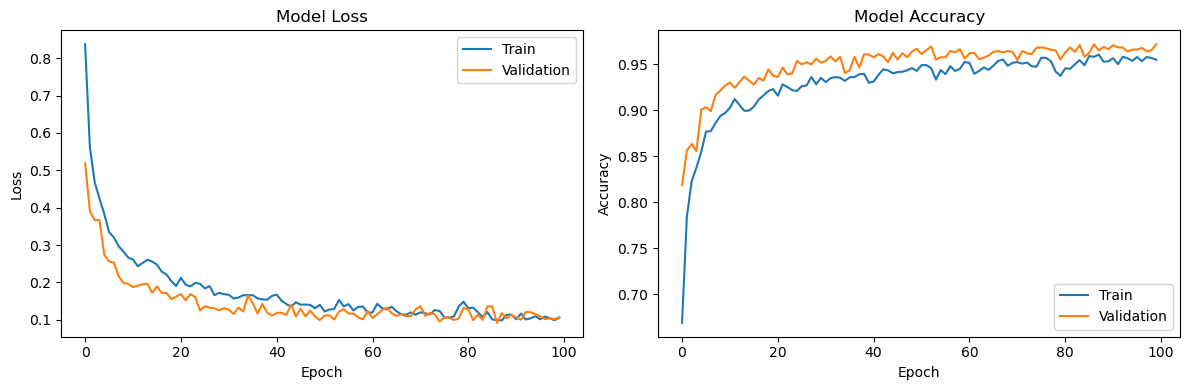

In [3]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 131716 (514.52 KB)
Trainable params: 131716 (514.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


80/80 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

      Class1       0.95      0.97      0.96       625
      Class2       0.97      0.97      0.97       665
      Class3       0.98      0.96      0.97       635
      Class4       0.95      0.95      0.95       635

    accuracy                           0.96      2560
   macro avg       0.96      0.96      0.96      2560
weighted avg       0.96      0.96      0.96      2560

80/80 [==============================] - 0s 2ms/step
ROC-AUC for Class1: 1.00
80/80 [==============================] - 0s 2ms/step
ROC-AUC for Class2: 1.00
80/80 [==============================] - 0s 1ms/step
ROC-AUC for Class3: 1.00
80/80 [==============================] - 0s 5ms/step
ROC-AUC for Class4: 1.00
80/80 [==============================] - 0s 2ms/step


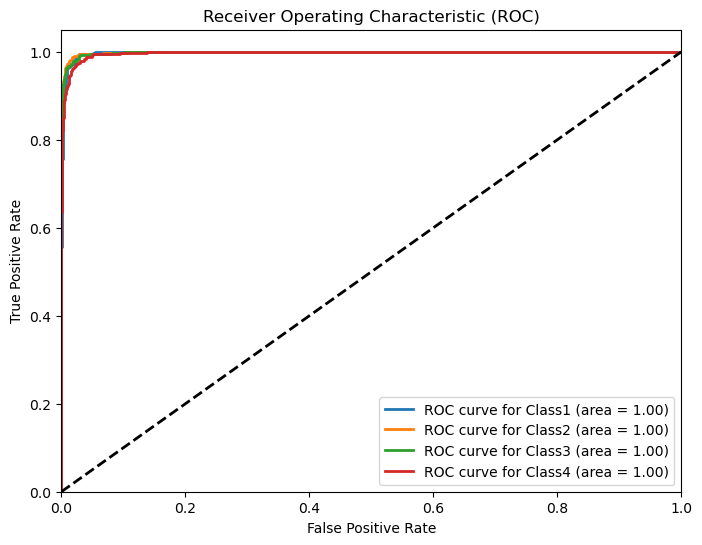

In [8]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, cohen_kappa_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integers
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate classification report with precision, recall, and F1-score
class_names = ["Class1", "Class2", "Class3", "Class4"]  # Replace with your class names
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)

# Calculate confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(len(class_names)):
    class_true = (y_true == i).astype(int)
    class_pred = model.predict(X_test)[:, i]
    roc_auc = roc_auc_score(class_true, class_pred)
    roc_auc_scores.append(roc_auc)
    print(f"ROC-AUC for {class_names[i]}: {roc_auc:.2f}")

# Compute ROC curve and ROC-AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    class_true = (y_true == i).astype(int)
    class_pred = model.predict(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(class_true, class_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for {class_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate and print other metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
sensitivity = recall_score(y_true, y_pred, average='macro')
specificity = accuracy_score(y_true, y_pred)

kappa = cohen_kappa_score(y_true, y_pred)




In [9]:
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")
print(f"Sensitivity: {sensitivity*100:.2f}%")
print(f"Specificity: {specificity*100:.2f}%")
print(f"Kappa Score: {kappa:.2f}")

Accuracy: 96.29%
Precision: 96.29%
Recall: 96.28%
F1-Score: 96.28%
Sensitivity: 96.28%
Specificity: 96.29%
Kappa Score: 0.95


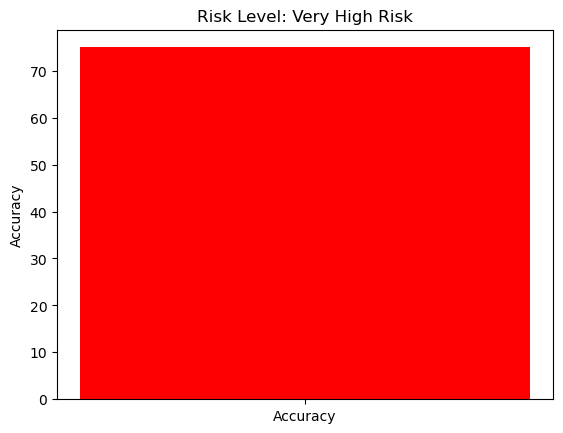

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy (modify this value based on your actual accuracy)
accuracy = 75  # Change this value

# Define risk levels and corresponding colors
low_risk_threshold = 20
high_risk_threshold = 40
very_high_risk_threshold = 60

# Determine the risk level based on accuracy
if accuracy < low_risk_threshold:
    risk_level = "Low Risk"
    color = "green"
elif accuracy < high_risk_threshold:
    risk_level = "High Risk"
    color = "orange"
else:
    risk_level = "Very High Risk"
    color = "red"

# Create a bar graph with the determined color
plt.bar(['Accuracy'], [accuracy], color=color)
plt.ylabel('Accuracy')
plt.title(f'Risk Level: {risk_level}')

plt.show()


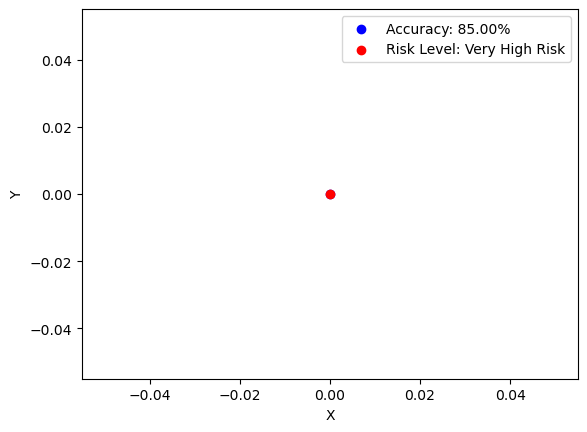

In [8]:
import matplotlib.pyplot as plt

# Replace this with your actual accuracy value
accuracy = 85.0  # Example accuracy (change this value)
# Scatter plot with a single point
plt.scatter(0, 0, c='b', label=f'Accuracy: {accuracy:.2f}%')
# Determine the color based on the accuracy level
if accuracy < 20:
    color = 'green'
    risk_level = 'Low Risk'
elif accuracy < 40:
    color = 'orange'
    risk_level = 'High Risk'
else:
    color = 'red'
    risk_level = 'Very High Risk'
# Plot the point with the determined color
plt.scatter(0, 0, c=color, label=f'Risk Level: {risk_level}')
# Set labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
# Display the scatter plot
plt.show()



In [10]:
model.save('CNN2d.h5')

/Users/vivekvardhan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
